### Chi-Squared Testing Using the Census Income Data Set


Data used is from the UCI Machine Learning Respository
https://archive.ics.uci.edu/dataset/20/census+income  
Download the Census Income data as a .csv for analysis  
See README.md for methodology in model selection & filtering

#### Import Libraries

In [2]:
# Load the following libraries
import pandas as pd # Pandas dataframes
import numpy as np  # 
import matplotlib.pyplot as plt # For plotting
from matplotlib import gridspec
import math # For general math equations
from scipy import stats # For statistics
from scipy.stats import norm # normal continuous random variable

#### Load the Census Income Data

In [3]:
# Use Pandas to read in all of the census income data
census_all = pd.read_csv('census.csv', sep= ',')
# Identify the data types 
census_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Use Pandas to read in selected columns from the census income data
# Removing all non-object columns for Chi-Squared Testing of qualitative variables
census_filt = pd.read_csv('census.csv', sep= ',', usecols=['race','education','income','marital-status','workclass','occupation','native-country'])
# View data types of filtered census income data 
census_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32560 non-null  object
 1   education       32560 non-null  object
 2   marital-status  32560 non-null  object
 3   occupation      32560 non-null  object
 4   race            32560 non-null  object
 5   native-country  32560 non-null  object
 6   income          32560 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


`Data types will be left as objects. Chi-squared testing will be used to compare these qualitative variables.`

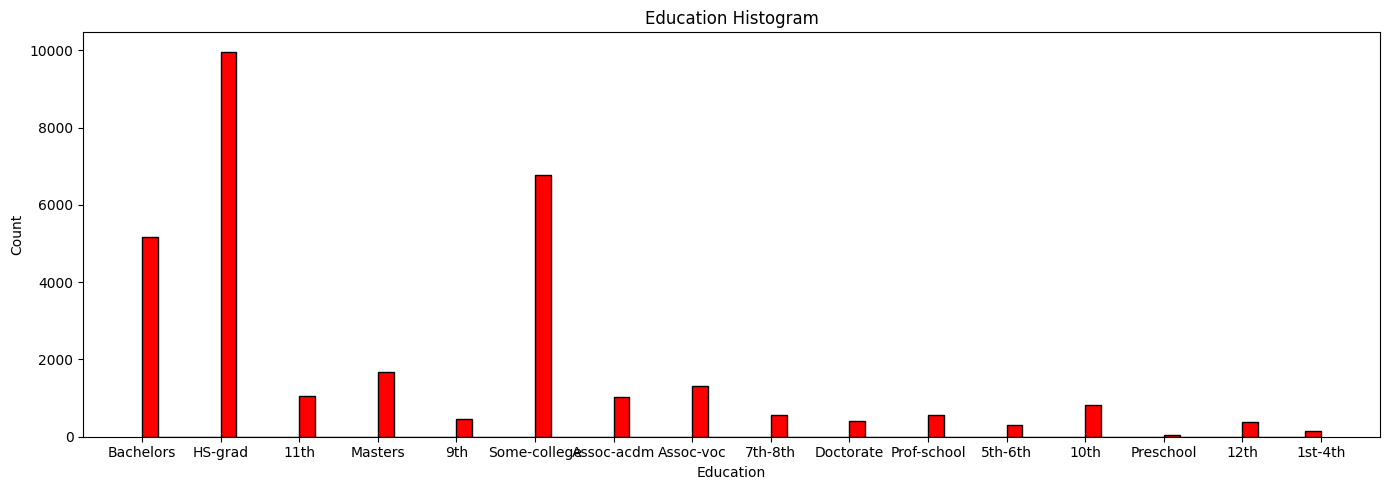

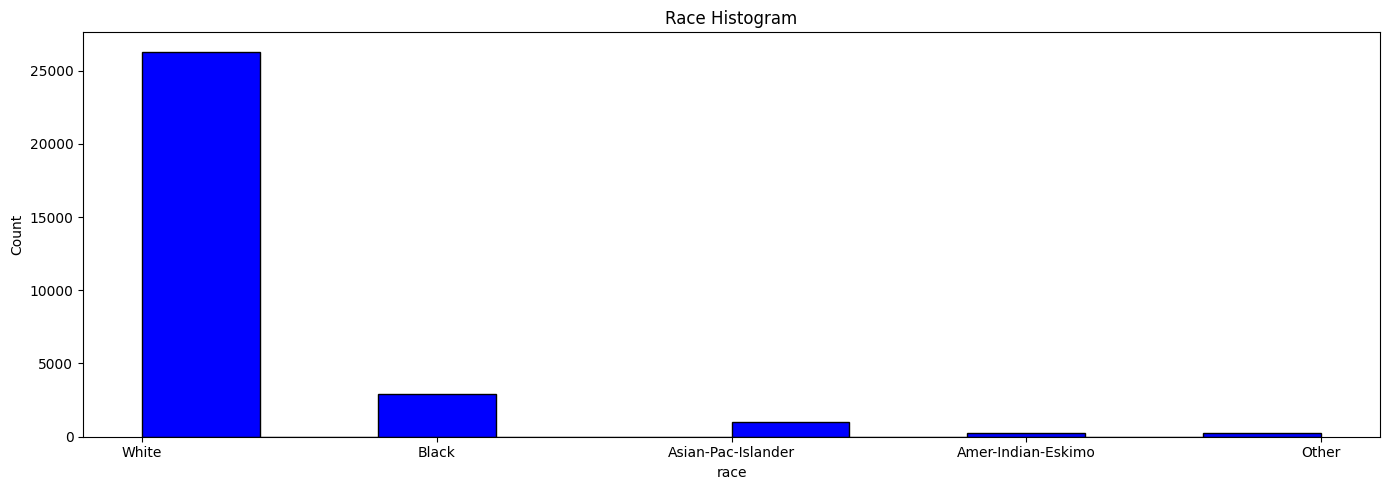

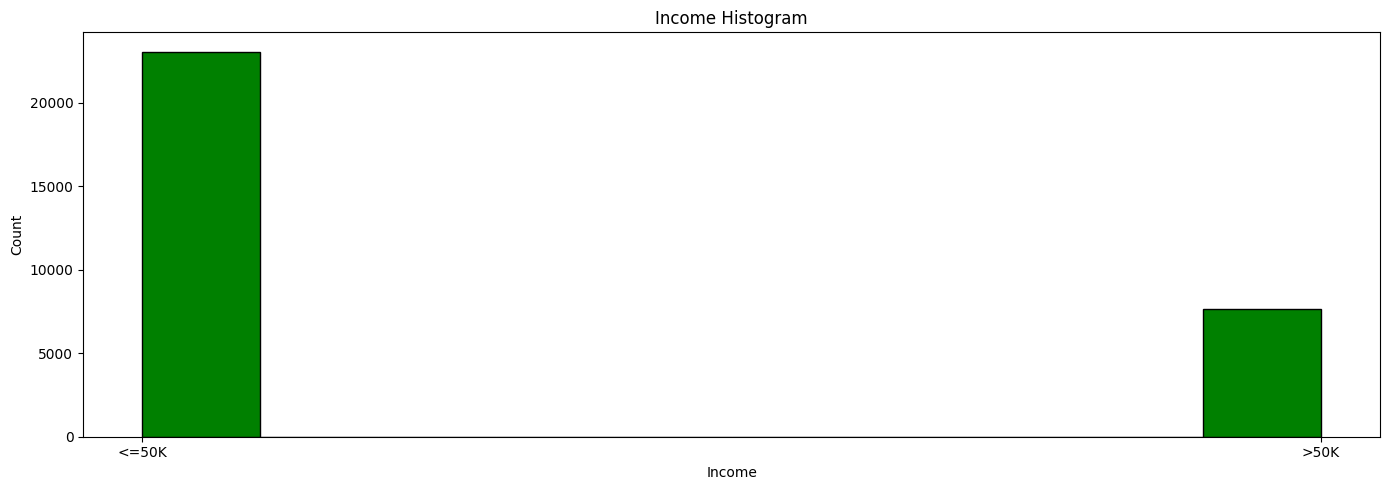

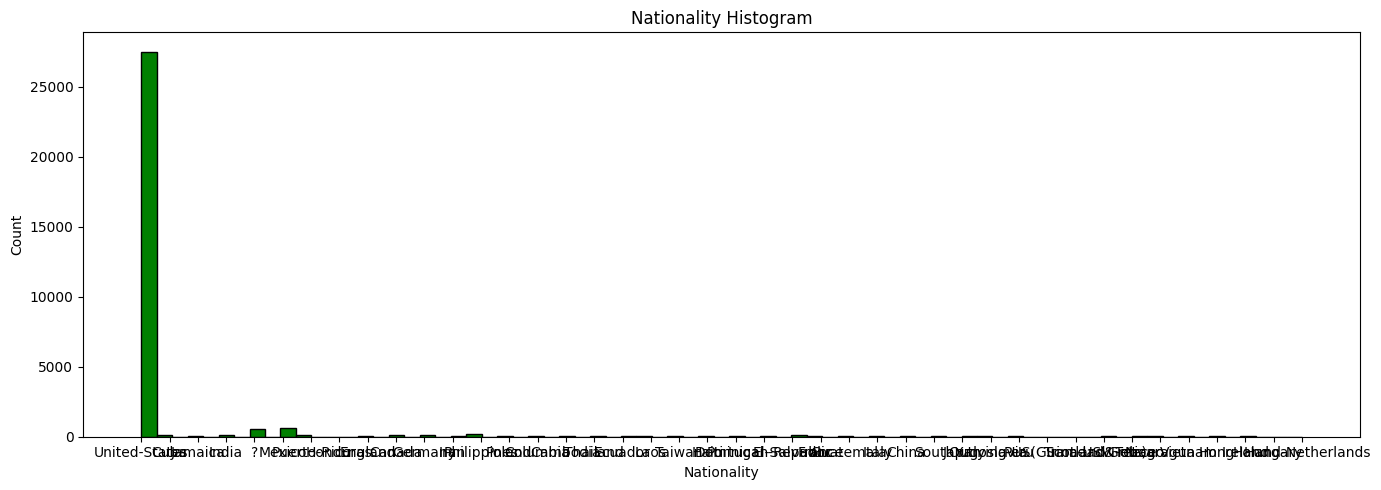

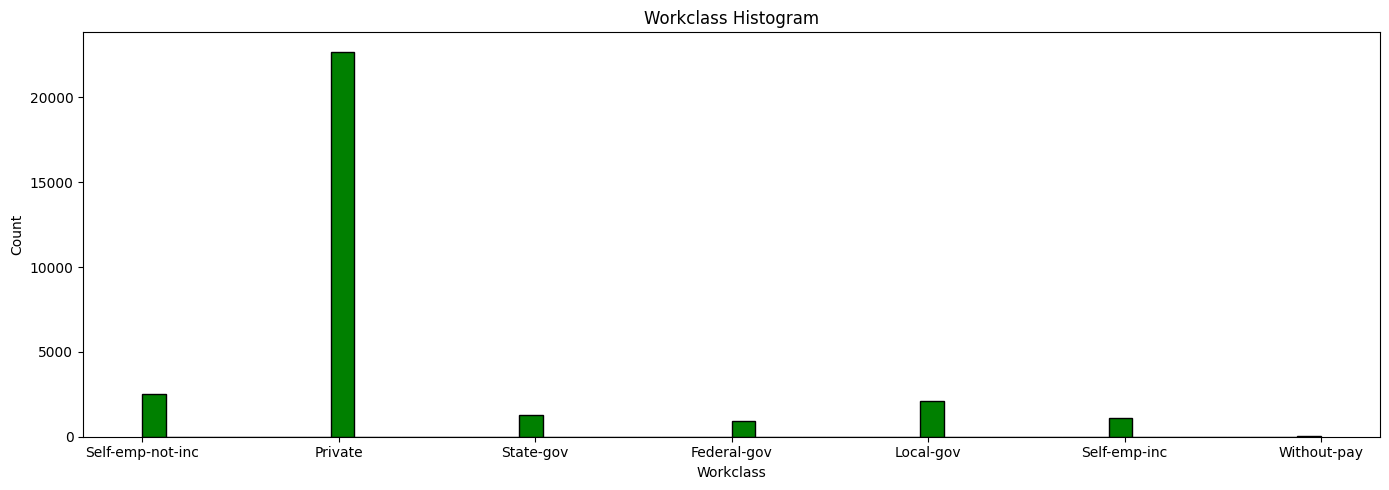

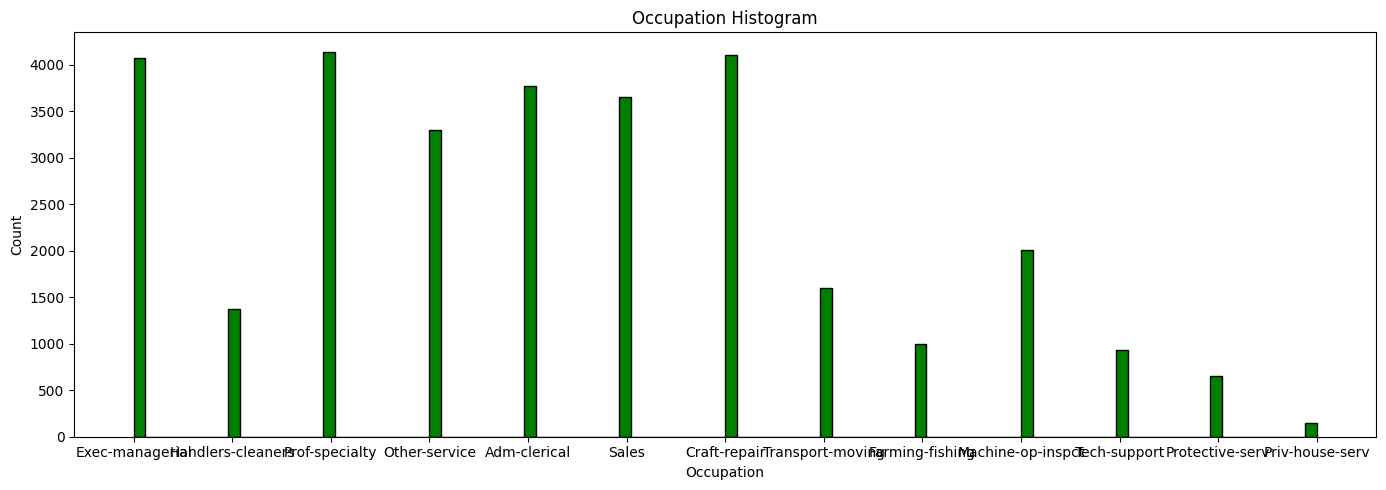

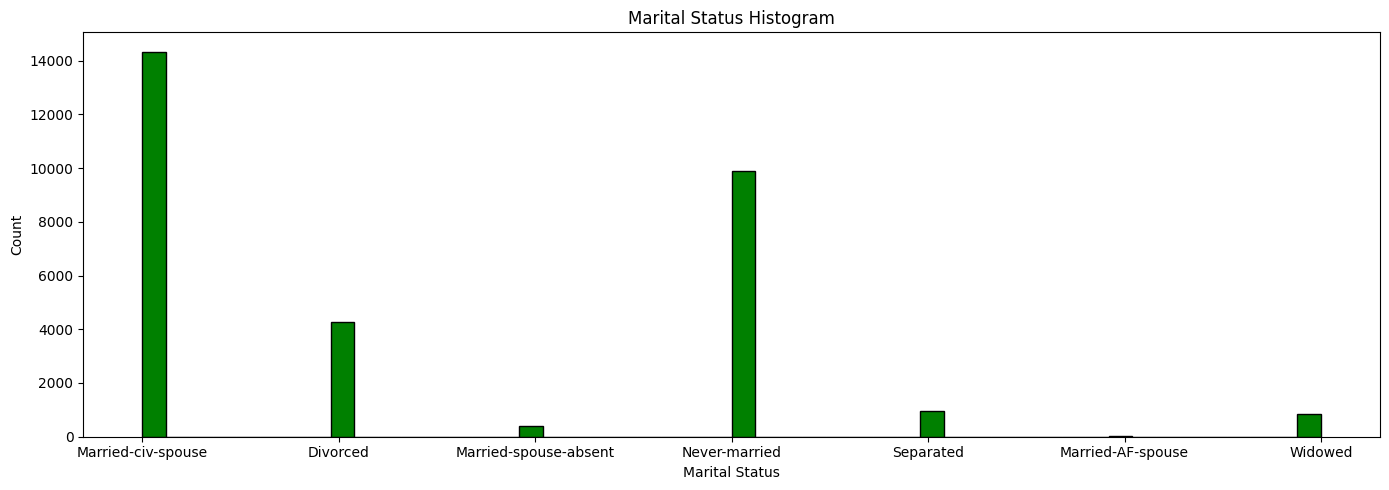

In [38]:
# Using Histograms to visualize the filtered census income dataset
plt.figure(figsize=(14, 5))
plt.hist(census_filt['education'], color='red', edgecolor='black', density=False, bins=75)
plt.ylabel('Count')
plt.xlabel('Education')
plt.title('Education Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['race'], color='blue', edgecolor='black', density=False, bins=10)
plt.ylabel('Count')
plt.xlabel('race')
plt.title('Race Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['income'], color='green', edgecolor='black', density=False, bins=10)
plt.ylabel('Count')
plt.xlabel('Income')
plt.title('Income Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['native-country'], color='green', edgecolor='black', density=False, bins=75)
plt.ylabel('Count')
plt.xlabel('Nationality')
plt.title('Nationality Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['workclass'], color='green', edgecolor='black', density=False, bins=50)
plt.ylabel('Count')
plt.xlabel('Workclass')
plt.title('Workclass Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['occupation'], color='green', edgecolor='black', density=False, bins=100)
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.title('Occupation Histogram')
plt.tight_layout()

plt.figure(figsize=(14, 5))
plt.hist(census_filt['marital-status'], color='green', edgecolor='black', density=False, bins=50)
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.title('Marital Status Histogram')
plt.tight_layout()

## Initial Observations
`By visualizing the data we get a better idea of the proportions amongst the categories. A few distinct observations can be made at this point.`  
`OBSERVATION 1: The 'RACE' category shows that the census data is primarily composed of respondents who identified themselves as belonging to the White race. We can also assume that respondents only had five choices to select from for 'RACE'.`  
`OBSERVATION 2: The 'NATIVE-COUNTRY' category shows that the majority of respondents were born in/or from the United States. An assumption can be made that some respondents identifying as being American but born abroad may have identified as being from the United States.`  
`OBSERVATION 3: The 'WORKCLASS' category shows that the majority of respondents work privately. It is unknown what this may encompass. Does it mean that most of the respondents work with private organizations, work on their own, or maybe didn't want to disclose this information? It is unknown. There is also a column labeled '?' and it is unknown what that could represent for a working class.`  
`OBSERVATION 4: The 'OCCUPATION' category has a column labeled '?'. It is unknown what that may represent.`

## Next Steps
`The next steps will involve cleaning the dataset to remove any selections that have a '?'. The initial observation shows that this number is low and will not significantly impact the data.`

## Questions Derived
`It will be interesting to see how many respondents that identified as White are not from the United States.`  
`We can compare each categories significance on the 'INCOME' category.`  
`With majority of respondents saying they work privately, can we drop the 'WORKCLASS' category from analysis?`  
`With majority of respondents being from the United States, is it worth analyzing the 'NATIVE-COUNTRY' category?`

## Data Cleaning

In [16]:
# Strip the data of any white spaces in the data
census_filt['race'] = census_filt['race'].str.strip()
census_filt['income'] =  census_filt['income'].str.strip()
census_filt['education'] = census_filt['education'].str.strip()
census_filt['marital-status'] =  census_filt['marital-status'].str.strip()
census_filt['workclass'] =  census_filt['workclass'].str.strip()
census_filt['native-country'] = census_filt['native-country'].str.strip()
census_filt['occupation'] =  census_filt['occupation'].str.strip()

`'WORKCLASS' category will not be analyzed.`  
`'Armed-Forces' had 9 entries. Removed from 'OCCUPATION'`  
`Remove '?' from 'OCCUPATION'`

In [73]:
# Remove rows with '?' and 'Armed-Forces' from the 'OCCUPATION' column
# Remove rows with '?' from 'NATIVE-COUNTRY'
census_filt = census_filt[census_filt['occupation'] != '?']
census_filt = census_filt[census_filt['native-country'] != '?']
census_filt = census_filt[census_filt['occupation'] != 'Armed-Forces']

In [72]:
# Verify the 'OCCUPATION' category is free from '?' and 'Armed-Forces'
#census_filt['occupation'].value_counts()

## Visualize the Cleaned Data
##### Decided to use a function to construct a bar graph for each variable.

In [74]:
# Create a plotting function
# Plotting function for discrete variables - JC
def discrete_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(14,5))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        df[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax, edgecolor='black')
        ax.set_xlabel(columns[i])
        ax.set_ylabel('Count', color='blue')
    fig.tight_layout()
    #fig.suptitle('Discrete Plot')
    plt.show()

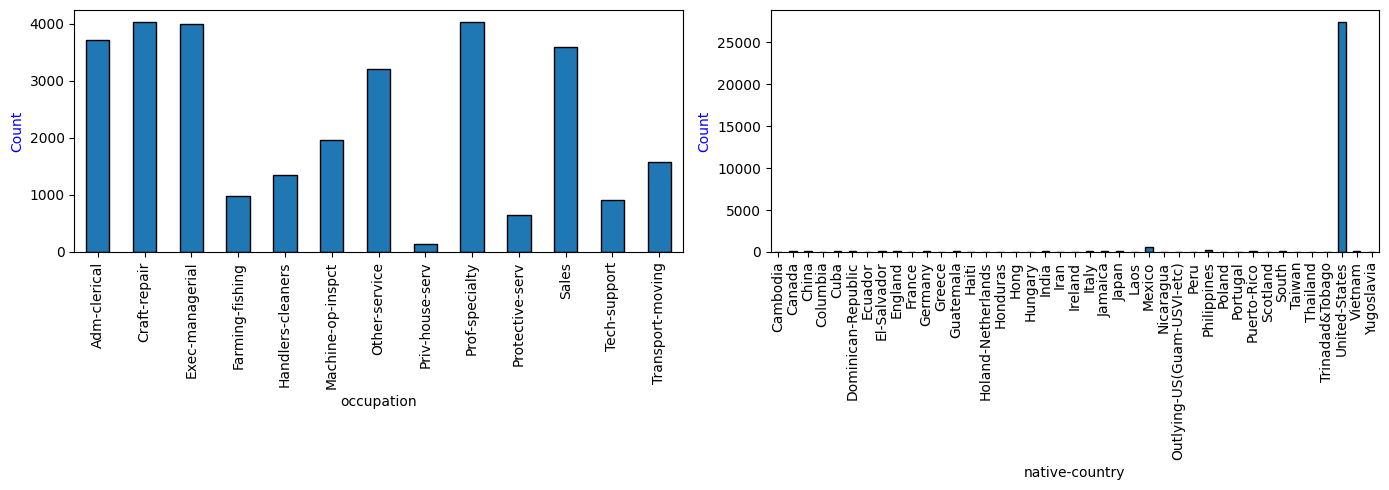

In [75]:
# display the discrete_plot function - JC
discrete_plots(census_filt, ['occupation','native-country'], 2)

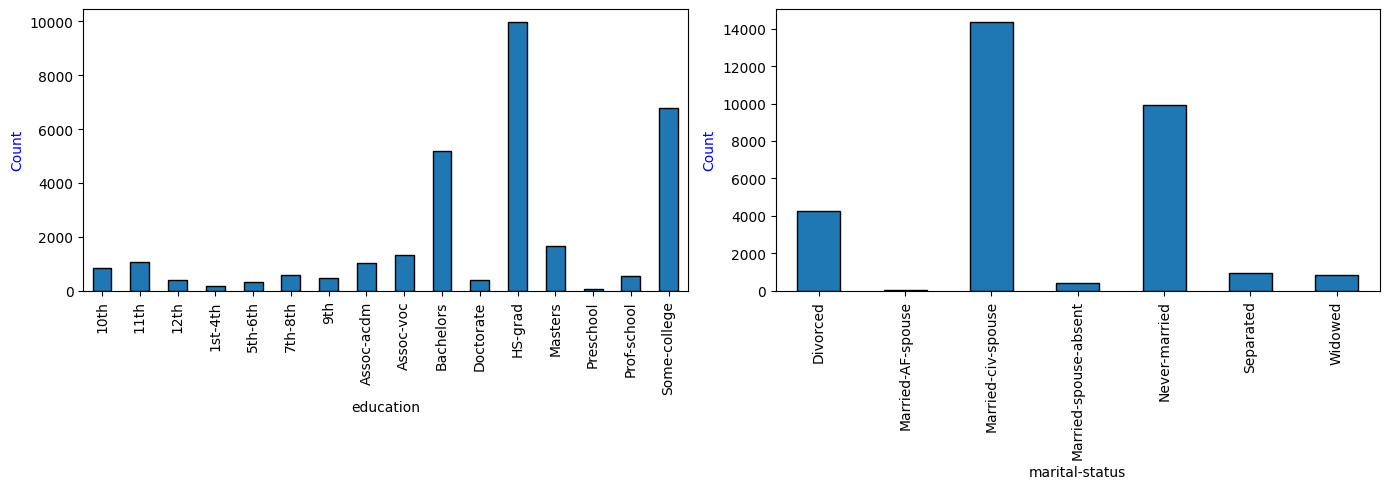

In [70]:
# display the discrete_plot function - JC
discrete_plots(census_filt, ['education','marital-status'], 2)

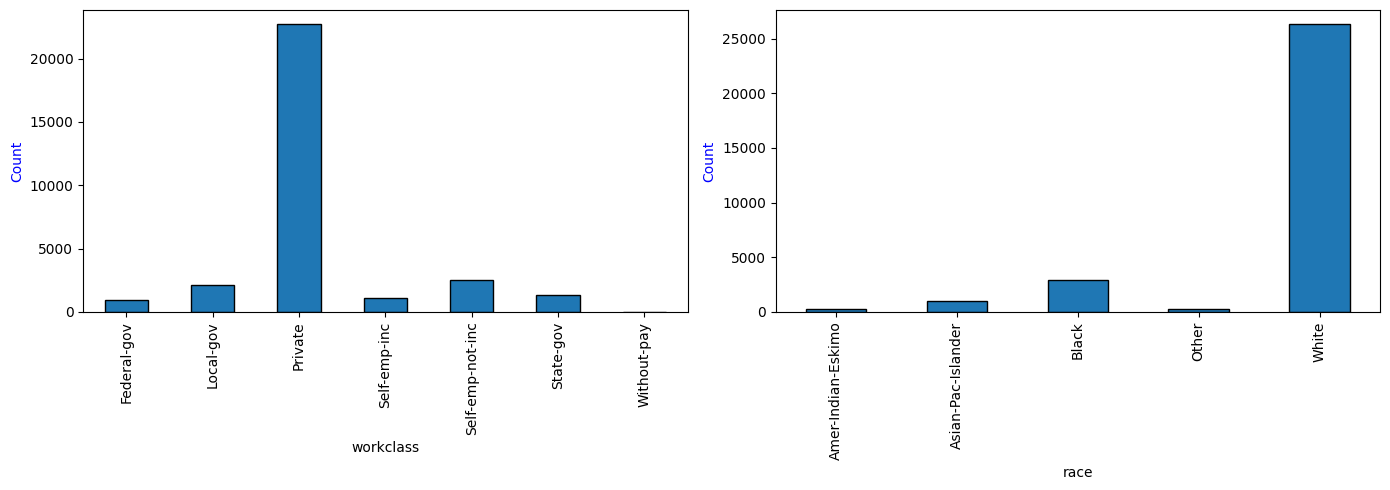

In [71]:
# display the discrete_plot function - JC
discrete_plots(census_filt, ['workclass','race'], 2)